# Import bibliotek

In [1]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn
import pathlib
import os
from os import listdir
import glob
from PIL import Image
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
    LayerNormalization,
    AveragePooling2D,
    RandomFlip,
    RandomRotation,
    RandomTranslation,
    RandomCrop,
    RandomBrightness,
    RandomContrast,
    RandomZoom
)

cinic_directory_train = 'D:\\GitHub\\cinic-10_image_classification_challenge-dataset\\train' #'C:\\Users\\48695\\Documents\\Studia\\DLM\\Projekt CNN\\cinic-10_image_classification_challenge-dataset\\train'
cinic_directory_test = 'D:\\GitHub\\cinic-10_image_classification_challenge-dataset\\test' #'C:\\Users\\48695\\Documents\\Studia\DLM\\Projekt CNN\\cinic-10_image_classification_challenge-dataset\\test'

SEED = 1337
splitfolder = 'D:\\GitHub\\cinic-10_image_classification_challenge-dataset\\'+str(SEED)

tf.random.set_seed(SEED)

class_name = []
file_name='output_fromKeras.csv'
optimiser='adamax'
nb_epochs=20
batch_size_choice=64
image_size=(32, 32)
loss_func='categorical_crossentropy'

c:\Users\kraft\miniconda3\envs\tf\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\kraft\miniconda3\envs\tf\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you wa

# Funkcje pomocnicze

In [2]:
def show_training_validation_loss_and_metrics(model,metrics):
    f,ax=plt.subplots(2,1,figsize=(10,10)) 

    #Assigning the first subplot to graph training loss and validation loss
    ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
    ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')

    #Plotting the training accuracy and validation accuracy
    for metric in metrics:
        ax[1].plot(model.history.history[metric],label='Training '+metric)
        ax[1].plot(model.history.history['val_'+metric],label='Validation '+metric)

    plt.legend() 

# Wczytanie danych

In [3]:
# splitfolders.ratio(cinic_directory_train, output=splitfolder,
#     seed=SEED, ratio=(.7, .1, .2), group_prefix=None, move=False)

In [4]:
datagen_train = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    brightness_range = [0.9,1.1],
    channel_shift_range = 50
    )
datagen_valid = ImageDataGenerator(samplewise_center=False)

In [5]:
# load and iterate training dataset
train_it = datagen_train.flow_from_directory(
    splitfolder+'\\train',
    seed=SEED,
    target_size=image_size,
    batch_size=batch_size_choice,
    color_mode="rgb",
    class_mode="categorical",
)
# load and iterate validation dataset
valid_it = datagen_valid.flow_from_directory(
    splitfolder+'\\val',
    seed=SEED,
    target_size=image_size,
    batch_size=batch_size_choice,
    color_mode="rgb",
    class_mode="categorical",
)
# load and iterate validation dataset
test_it = datagen_valid.flow_from_directory(
    splitfolder+'\\test',
    seed=SEED,
    target_size=image_size,
    batch_size=batch_size_choice,
    color_mode="rgb",
    class_mode="categorical",
)
# loading in the data
# train_ds = keras.preprocessing.image_dataset_from_directory(
#     splitfolder+'\\train',
#     seed=SEED,
#     image_size=image_size,
#     batch_size=batch_size_choice,
#     label_mode = "categorical"
# ) 
# validation_ds = keras.preprocessing.image_dataset_from_directory(
#     splitfolder+'\\val',
#     seed=SEED,
#     image_size=image_size,
#     batch_size=batch_size_choice,
#     label_mode = "categorical"
# )
# test_ds = keras.preprocessing.image_dataset_from_directory(
#     splitfolder+'\\test',
#     seed=SEED,
#     image_size=image_size,
#     batch_size=batch_size_choice,
#     label_mode = "categorical"
# )

Found 63000 images belonging to 10 classes.
Found 9000 images belonging to 10 classes.
Found 18000 images belonging to 10 classes.


In [6]:
# # Pobranie kilku partii danych z iteratora train_it
# num_images_to_display = 1
# for i in range(num_images_to_display):
#     batch = next(iter(train_it))  # Pobranie kolejnej partii danych
#     images, labels = batch[0], batch[1]  # Podział partii na obrazy i etykiety
#     for j in range(len(images)):
#         plt.imshow(images[j].astype('uint8'))  # Wyświetlenie obrazu
#         plt.title(f"Label: {labels[j]}")  # Wyświetlenie etykiety obrazu
#         plt.show()
# Pobierz jedną partię danych z train_ds
# for images, labels in train_ds.take(1):
#     first_image = images[0]  # Pobierz pierwszy obraz
#     plt.imshow(first_image.numpy().astype("uint8"))  # Wyświetl obraz
#     plt.axis('off')  # Wyłącz oś
#     plt.show()

In [7]:

# data_augmentation = Sequential([
#   RandomFlip("horizontal",seed=SEED),
#   RandomRotation(0.1,seed=SEED),
#   RandomBrightness(0.1,seed=SEED),
#   RandomContrast(0.1,seed=SEED),
#   RandomTranslation(0.1,0.1,seed=SEED),
#   RandomZoom(0.1,seed=SEED),
#   RandomCrop(24,24,seed=SEED)
# ])

# for images, labels in train_ds.take(1):
#     # Iteruj po każdym obrazie w partii
#     for i in range(len(images)):
#         plt.imshow(data_augmentation(images[i]).numpy().astype("uint8"))  # Wyświetl obraz
#         plt.title(f"Label: {labels[i].numpy()}")  # Wyświetl etykietę obrazu
#         plt.axis('off')  # Wyłącz oś
#         plt.show()


In [8]:
class_names= ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
num_classes = len(class_names)
print(class_names)

metrics = ['categorical_accuracy','AUC','Precision','Recall', tfa.metrics.F1Score(num_classes=num_classes, threshold=0.5, average='weighted')]

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [9]:
# Inicjalizacja słownika do zliczania liczby obrazów w każdej klasie
#class_count = {class_name: 0 for class_name in class_names}

# Przechodzenie przez zbiór danych i zliczanie obrazów w każdej klasie
#for images, labels in train_ds:
#    for label in labels.numpy():
#        class_count[class_names[label]] += 1

# Wyświetlenie liczby obrazów w każdej klasie
#for class_name, count in class_count.items():
#    print(f"Liczba obrazów w klasie {class_name}: {count}")

# Dane do wykresu słupkowego
#class_names = list(class_count.keys())
#counts = list(class_count.values())

# Tworzenie wykresu słupkowego
#plt.figure(figsize=(10, 6))
#plt.bar(class_names, counts, color='skyblue')
#plt.xlabel('Klasa')
#plt.ylabel('Liczba obrazów')
#plt.title('Liczba obrazów w każdej klasie')
#plt.xticks(rotation=45, ha='right')
#plt.tight_layout()

# Wyświetlenie wykresu
#plt.show()

# Architektura pierwszego modelu

In [10]:
model1 = Sequential()

# model1.add(RandomFlip("horizontal",seed=SEED))
# model1.add(RandomRotation(0.1,seed=SEED))
# model1.add(RandomBrightness(0.1,seed=SEED))
# model1.add(RandomContrast(0.1,seed=SEED))
# model1.add(RandomTranslation(0.1,0.1,seed=SEED))
# model1.add(RandomZoom(0.1,seed=SEED))
# model1.add(RandomCrop(24,24,seed=SEED))

model1.add(Conv2D(256, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(32, 32, 3)))
model1.add(BatchNormalization())
model1.add(MaxPool2D((2, 2), strides=2, padding="same"))
model1.add(Conv2D(128, (3, 3), strides=1, padding="same", activation="relu"))
model1.add(BatchNormalization())
model1.add(MaxPool2D((2, 2), strides=2, padding="same"))
model1.add(Dropout(0.2))
model1.add(Conv2D(64, (3, 3), strides=1, padding="same", activation="relu"))
model1.add(BatchNormalization())
model1.add(MaxPool2D((2, 2), strides=2, padding="same"))
model1.add(Conv2D(32, (3, 3), strides=1, padding="same", activation="relu"))
model1.add(BatchNormalization())
model1.add(MaxPool2D((2, 2), strides=2, padding="same"))
model1.add(Flatten())
model1.add(Dense(units=512))
model1.add(Dropout(0.3))
model1.add(Dense(units=num_classes, activation="softmax"))

#model1_with_augmentation = Sequential([data_augmentation,model1])

In [11]:
model1.compile( 
    loss=loss_func,
    metrics=metrics
)

In [12]:
#model1.build((None,32,32,3))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       295040    
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 128)      512       
 hNormalization)                                                 
                                                        

In [13]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model1.fit(
    train_it,
    validation_data=valid_it,
    steps_per_epoch=train_it.samples/train_it.batch_size,
    validation_steps=valid_it.samples/valid_it.batch_size, 
    epochs=nb_epochs,
    callbacks = [callback] 
)

Epoch 1/20
984/984 [==============================] - 65s 62ms/step - loss: 1.7957 - categorical_accuracy: 0.3563 - auc: 0.8131 - precision: 0.5128 - recall: 0.1625 - f1_score: 0.2317 - val_loss: 1.6244 - val_categorical_accuracy: 0.4138 - val_auc: 0.8525 - val_precision: 0.5345 - val_recall: 0.2610 - val_f1_score: 0.2812
Epoch 2/20
984/984 [==============================] - 60s 61ms/step - loss: 1.4466 - categorical_accuracy: 0.4723 - auc: 0.8794 - precision: 0.6523 - recall: 0.2745 - f1_score: 0.3596 - val_loss: 1.5012 - val_categorical_accuracy: 0.4690 - val_auc: 0.8750 - val_precision: 0.5977 - val_recall: 0.3493 - val_f1_score: 0.3683
Epoch 3/20
984/984 [==============================] - 60s 61ms/step - loss: 1.3374 - categorical_accuracy: 0.5130 - auc: 0.8976 - precision: 0.6857 - recall: 0.3336 - f1_score: 0.4232 - val_loss: 1.3681 - val_categorical_accuracy: 0.5024 - val_auc: 0.8935 - val_precision: 0.6527 - val_recall: 0.3496 - val_f1_score: 0.4001
Epoch 4/20
984/984 [========

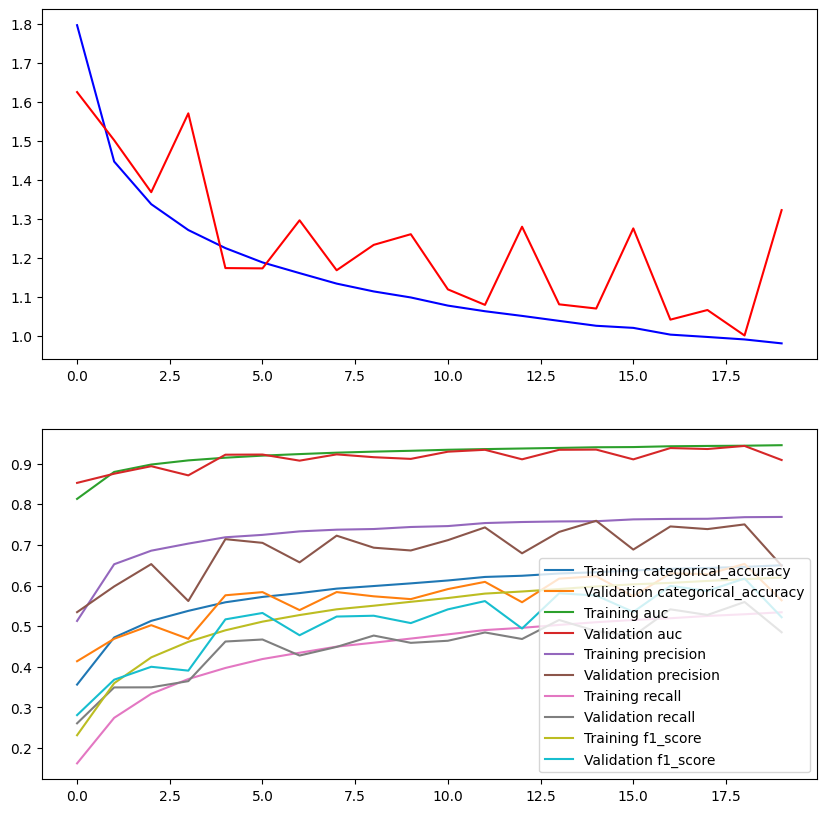

In [14]:
metrics2 = ['categorical_accuracy','auc','precision','recall','f1_score']
show_training_validation_loss_and_metrics(model1,metrics2)

In [15]:
model1.evaluate(test_it)

282/282 [==============================] - 8s 27ms/step - loss: 1.3082 - categorical_accuracy: 0.5632 - auc: 0.9095 - precision: 0.6499 - recall: 0.4822 - f1_score: 0.5205


[1.3081949949264526,
 0.5631666779518127,
 0.9094884395599365,
 0.6499176025390625,
 0.48216667771339417,
 0.5205109119415283]

# Architektura drugiego modelu

In [16]:
model2 = Sequential()
model2.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(32, 32, 3)))
model2.add(LayerNormalization())
model2.add(AveragePooling2D((2, 2), strides=2, padding="same"))
model2.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model2.add(LayerNormalization())
model2.add(AveragePooling2D((2, 2), strides=2, padding="same"))
model2.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model2.add(LayerNormalization())
model2.add(AveragePooling2D((2, 2), strides=2, padding="same"))
model2.add(LayerNormalization())
model2.add(Flatten())
model2.add(Dense(units=512))
model2.add(Dense(units=num_classes, activation="softmax"))

In [17]:
model2.compile( 
    loss=loss_func,
    metrics=metrics
)

In [18]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 75)        2100      
                                                                 
 layer_normalization (LayerN  (None, 32, 32, 75)       150       
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 75)       0         
 ooling2D)                                                       
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 50)        33800     
                                                                 
 layer_normalization_1 (Laye  (None, 16, 16, 50)       100       
 rNormalization)                                                 
                                                      

In [19]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model2.fit(
    train_it,
    validation_data=valid_it,
    steps_per_epoch=train_it.samples/train_it.batch_size,
    validation_steps=valid_it.samples/valid_it.batch_size, 
    epochs=20, 
    callbacks = [callback]
)

Epoch 1/20
984/984 [==============================] - 61s 61ms/step - loss: 2.0644 - categorical_accuracy: 0.2655 - auc: 0.7332 - precision: 0.4733 - recall: 0.0565 - f1_score: 0.2287 - val_loss: 1.6743 - val_categorical_accuracy: 0.3916 - val_auc: 0.8341 - val_precision: 0.5844 - val_recall: 0.1751 - val_f1_score: 0.2302
Epoch 2/20
984/984 [==============================] - 60s 61ms/step - loss: 1.6461 - categorical_accuracy: 0.3975 - auc: 0.8393 - precision: 0.6278 - recall: 0.1519 - f1_score: 0.2231 - val_loss: 1.5960 - val_categorical_accuracy: 0.4388 - val_auc: 0.8520 - val_precision: 0.6165 - val_recall: 0.2440 - val_f1_score: 0.3004
Epoch 3/20
984/984 [==============================] - 60s 61ms/step - loss: 1.5416 - categorical_accuracy: 0.4353 - auc: 0.8611 - precision: 0.6569 - recall: 0.2087 - f1_score: 0.2888 - val_loss: 1.3996 - val_categorical_accuracy: 0.4939 - val_auc: 0.8870 - val_precision: 0.6910 - val_recall: 0.2932 - val_f1_score: 0.3680
Epoch 4/20
984/984 [========

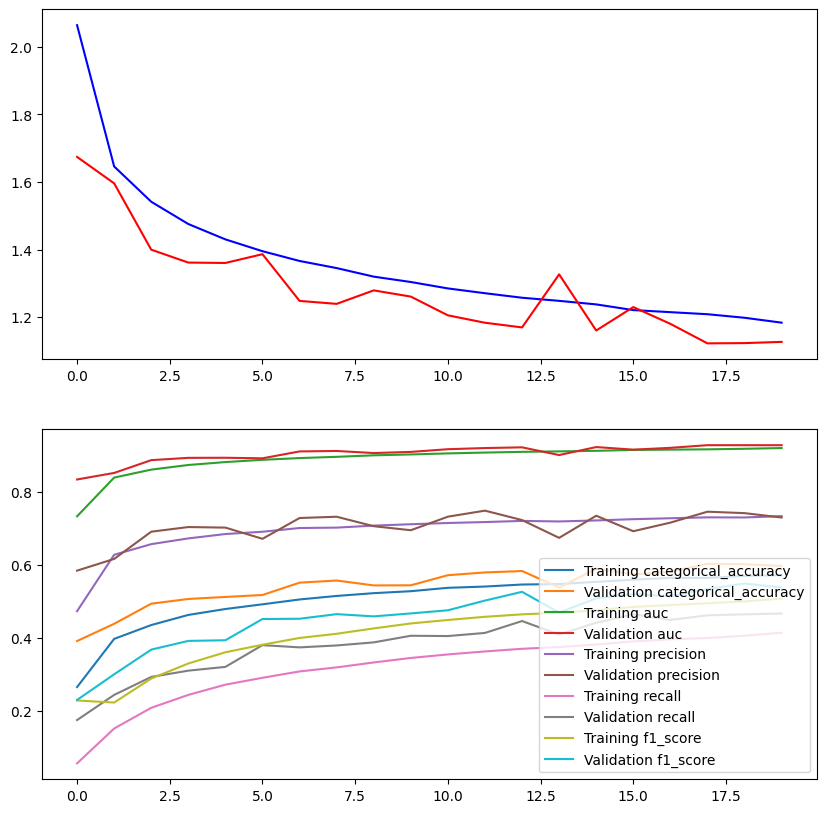

In [20]:
show_training_validation_loss_and_metrics(model2,metrics2)

In [21]:
model2.evaluate(test_it)

282/282 [==============================] - 7s 26ms/step - loss: 1.1004 - categorical_accuracy: 0.6053 - auc: 0.9312 - precision: 0.7374 - recall: 0.4741 - f1_score: 0.5476


[1.1004420518875122,
 0.6053333282470703,
 0.93121337890625,
 0.7374470829963684,
 0.47405555844306946,
 0.5475671291351318]

# Architektura trzeciego modelu

In [22]:
model3 = Sequential()
model3.add(Conv2D(256, (3, 3), strides=1, padding="same", activation="sigmoid", 
                 input_shape=(32, 32, 3)))
model3.add(LayerNormalization())
model3.add(MaxPool2D((2, 2), strides=2, padding="same"))
model3.add(Conv2D(128, (3, 3), strides=1, padding="same", activation="sigmoid"))
model3.add(LayerNormalization())
model3.add(MaxPool2D((2, 2), strides=2, padding="same"))
model3.add(Dropout(0.2))
model3.add(Conv2D(64, (3, 3), strides=1, padding="same", activation="sigmoid"))
model3.add(LayerNormalization())
model3.add(MaxPool2D((2, 2), strides=2, padding="same"))
model3.add(Conv2D(32, (3, 3), strides=1, padding="same", activation="sigmoid"))
model3.add(LayerNormalization())
model3.add(MaxPool2D((2, 2), strides=2, padding="same"))
model3.add(Conv2D(16, (3, 3), strides=1, padding="same", activation="sigmoid"))
model3.add(LayerNormalization())
model3.add(MaxPool2D((2, 2), strides=2, padding="same"))
model3.add(Flatten())
model3.add(Dense(units=1024))
model3.add(Dropout(0.3))
model3.add(Dense(units=num_classes, activation="softmax"))

model3.compile( 
    optimizer=optimiser,
    loss=loss_func,
    metrics=metrics
)

#model3.summary()

In [23]:
history = model3.fit(
    train_it,
    validation_data=valid_it,
    steps_per_epoch=train_it.samples/train_it.batch_size,
    validation_steps=valid_it.samples/valid_it.batch_size, 
    epochs=20, 
    callbacks = [callback]
)

Epoch 1/20
984/984 [==============================] - 62s 62ms/step - loss: 1.8276 - categorical_accuracy: 0.3084 - auc: 0.7922 - precision: 0.5931 - recall: 0.0540 - f1_score: 0.2313 - val_loss: 1.5996 - val_categorical_accuracy: 0.3863 - val_auc: 0.8504 - val_precision: 0.5721 - val_recall: 0.1839 - val_f1_score: 0.2291
Epoch 2/20
984/984 [==============================] - 60s 61ms/step - loss: 1.6111 - categorical_accuracy: 0.3935 - auc: 0.8469 - precision: 0.6307 - recall: 0.1500 - f1_score: 0.2151 - val_loss: 1.4744 - val_categorical_accuracy: 0.4376 - val_auc: 0.8754 - val_precision: 0.6228 - val_recall: 0.2372 - val_f1_score: 0.2861
Epoch 3/20
984/984 [==============================] - 60s 61ms/step - loss: 1.5151 - categorical_accuracy: 0.4371 - auc: 0.8664 - precision: 0.6580 - recall: 0.2101 - f1_score: 0.2838 - val_loss: 1.4341 - val_categorical_accuracy: 0.4637 - val_auc: 0.8817 - val_precision: 0.6440 - val_recall: 0.2818 - val_f1_score: 0.3387
Epoch 4/20
984/984 [========

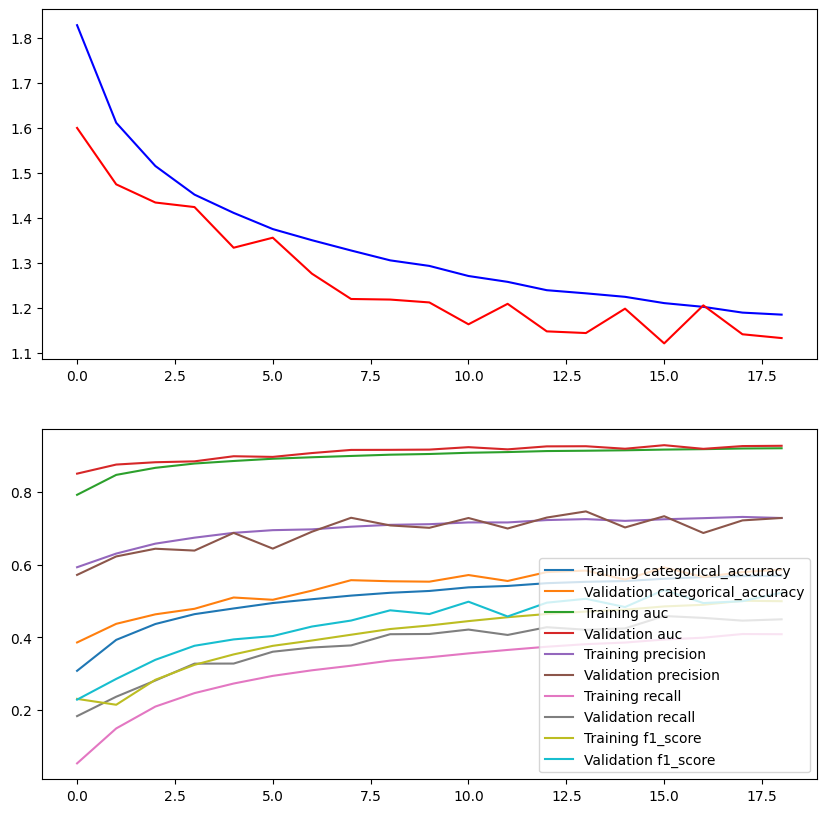

In [24]:
show_training_validation_loss_and_metrics(model3,metrics2)

In [25]:
model3.evaluate(test_it)

282/282 [==============================] - 8s 27ms/step - loss: 1.1198 - categorical_accuracy: 0.5936 - auc: 0.9288 - precision: 0.7411 - recall: 0.4533 - f1_score: 0.5287


[1.1198362112045288,
 0.5936111211776733,
 0.9287807941436768,
 0.741053581237793,
 0.4532777667045593,
 0.5287144184112549]

# Ziarno 1234

In [26]:
SEED = 1234
splitfolder = 'D:\\GitHub\\cinic-10_image_classification_challenge-dataset\\'+str(SEED)

tf.random.set_seed(SEED)

splitfolders.ratio(cinic_directory_train, output=splitfolder,
    seed=SEED, ratio=(.7, .1, .2), group_prefix=None, move=False)

Copying files: 0 files [00:00, ? files/s]

Copying files: 90000 files [02:20, 638.70 files/s]


In [27]:
datagen_train = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    brightness_range = [0.9,1.1],
    channel_shift_range = 50
    )
datagen_valid = ImageDataGenerator(samplewise_center=False)

In [28]:
# load and iterate training dataset
train_it = datagen_train.flow_from_directory(
    splitfolder+'\\train',
    seed=SEED,
    target_size=image_size,
    batch_size=batch_size_choice,
    color_mode="rgb",
    class_mode="categorical",
)
# load and iterate validation dataset
valid_it = datagen_valid.flow_from_directory(
    splitfolder+'\\val',
    seed=SEED,
    target_size=image_size,
    batch_size=batch_size_choice,
    color_mode="rgb",
    class_mode="categorical",
)
# load and iterate validation dataset
test_it = datagen_valid.flow_from_directory(
    splitfolder+'\\test',
    seed=SEED,
    target_size=image_size,
    batch_size=batch_size_choice,
    color_mode="rgb",
    class_mode="categorical",
)
# loading in the data
# train_ds = keras.preprocessing.image_dataset_from_directory(
#     splitfolder+'\\train',
#     seed=SEED,
#     image_size=image_size,
#     batch_size=batch_size_choice,
#     label_mode = "categorical"
# ) 
# validation_ds = keras.preprocessing.image_dataset_from_directory(
#     splitfolder+'\\val',
#     seed=SEED,
#     image_size=image_size,
#     batch_size=batch_size_choice,
#     label_mode = "categorical"
# )
# test_ds = keras.preprocessing.image_dataset_from_directory(
#     splitfolder+'\\test',
#     seed=SEED,
#     image_size=image_size,
#     batch_size=batch_size_choice,
#     label_mode = "categorical"
# )

Found 63000 images belonging to 10 classes.
Found 9000 images belonging to 10 classes.
Found 18000 images belonging to 10 classes.


In [29]:
class_names= ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
num_classes = len(class_names)
print(class_names)

metrics = ['accuracy','AUC','Precision','Recall', tfa.metrics.F1Score(num_classes=num_classes, threshold=0.5, average='weighted')]

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# Architektura pierwszego modelu

In [30]:
model11 = Sequential()

# model1.add(RandomFlip("horizontal",seed=SEED))
# model1.add(RandomRotation(0.1,seed=SEED))
# model1.add(RandomBrightness(0.1,seed=SEED))
# model1.add(RandomContrast(0.1,seed=SEED))
# model1.add(RandomTranslation(0.1,0.1,seed=SEED))
# model1.add(RandomZoom(0.1,seed=SEED))
# model1.add(RandomCrop(24,24,seed=SEED))

model11.add(Conv2D(256, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(32, 32, 3)))
model11.add(BatchNormalization())
model11.add(MaxPool2D((2, 2), strides=2, padding="same"))
model11.add(Conv2D(128, (3, 3), strides=1, padding="same", activation="relu"))
model11.add(BatchNormalization())
model11.add(MaxPool2D((2, 2), strides=2, padding="same"))
model11.add(Dropout(0.2))
model11.add(Conv2D(64, (3, 3), strides=1, padding="same", activation="relu"))
model11.add(BatchNormalization())
model11.add(MaxPool2D((2, 2), strides=2, padding="same"))
model11.add(Conv2D(32, (3, 3), strides=1, padding="same", activation="relu"))
model11.add(BatchNormalization())
model11.add(MaxPool2D((2, 2), strides=2, padding="same"))
model11.add(Flatten())
model11.add(Dense(units=512))
model11.add(Dropout(0.3))
model11.add(Dense(units=num_classes, activation="softmax"))

#model1_with_augmentation = Sequential([data_augmentation,model1])

In [31]:
model11.compile( 
    loss=loss_func,
    metrics=metrics
)

In [32]:
#model1.build((None,32,32,3))
model11.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 256)      0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 128)       295040    
                                                                 
 batch_normalization_5 (Batc  (None, 16, 16, 128)      512       
 hNormalization)                                                 
                                                      

In [33]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model11.fit(
    train_it,
    validation_data=valid_it,
    steps_per_epoch=train_it.samples/train_it.batch_size,
    validation_steps=valid_it.samples/valid_it.batch_size, 
    epochs=nb_epochs,
    callbacks = [callback] 
)

Epoch 1/20
984/984 [==============================] - 53s 53ms/step - loss: 1.7979 - accuracy: 0.3557 - auc: 0.8125 - precision: 0.5109 - recall: 0.1596 - f1_score: 0.2278 - val_loss: 1.8876 - val_accuracy: 0.3690 - val_auc: 0.8068 - val_precision: 0.5003 - val_recall: 0.2414 - val_f1_score: 0.2652
Epoch 2/20
984/984 [==============================] - 52s 53ms/step - loss: 1.4406 - accuracy: 0.4735 - auc: 0.8807 - precision: 0.6533 - recall: 0.2775 - f1_score: 0.3621 - val_loss: 1.2571 - val_accuracy: 0.5390 - val_auc: 0.9103 - val_precision: 0.6966 - val_recall: 0.3728 - val_f1_score: 0.4396
Epoch 3/20
984/984 [==============================] - 51s 52ms/step - loss: 1.3299 - accuracy: 0.5173 - auc: 0.8988 - precision: 0.6888 - recall: 0.3383 - f1_score: 0.4272 - val_loss: 1.2960 - val_accuracy: 0.5422 - val_auc: 0.9038 - val_precision: 0.7335 - val_recall: 0.3459 - val_f1_score: 0.4311
Epoch 4/20
984/984 [==============================] - 52s 53ms/step - loss: 1.2708 - accuracy: 0.539

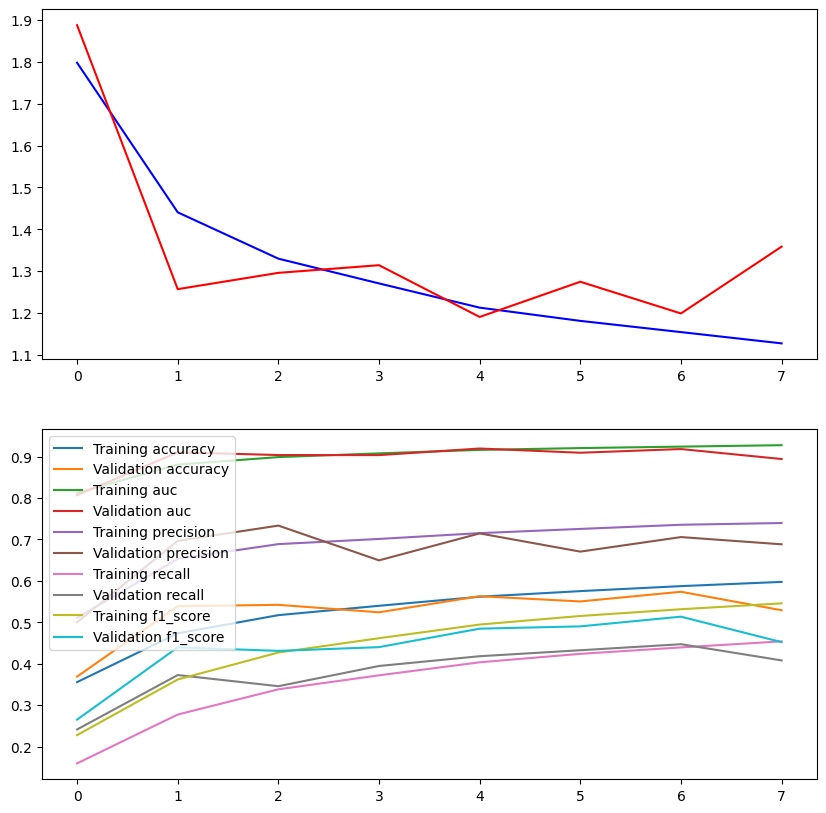

In [34]:
metrics2 = ['accuracy','auc','precision','recall','f1_score']
show_training_validation_loss_and_metrics(model11,metrics2)

In [35]:
model11.evaluate(test_it)

282/282 [==============================] - 5s 19ms/step - loss: 1.3472 - accuracy: 0.5317 - auc: 0.8963 - precision: 0.6898 - recall: 0.4117 - f1_score: 0.4556


[1.3471518754959106,
 0.5316666960716248,
 0.8963273167610168,
 0.6897803544998169,
 0.41172221302986145,
 0.4555911421775818]

# Architektura drugiego modelu

In [36]:
model21 = Sequential()
model21.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(32, 32, 3)))
model21.add(LayerNormalization())
model21.add(AveragePooling2D((2, 2), strides=2, padding="same"))
model21.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model21.add(LayerNormalization())
model21.add(AveragePooling2D((2, 2), strides=2, padding="same"))
model21.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model21.add(LayerNormalization())
model21.add(AveragePooling2D((2, 2), strides=2, padding="same"))
model21.add(LayerNormalization())
model21.add(Flatten())
model21.add(Dense(units=512))
model21.add(Dense(units=num_classes, activation="softmax"))

In [37]:
model21.compile( 
    loss=loss_func,
    metrics=metrics
)

In [38]:
model21.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 75)        2100      
                                                                 
 layer_normalization_9 (Laye  (None, 32, 32, 75)       150       
 rNormalization)                                                 
                                                                 
 average_pooling2d_3 (Averag  (None, 16, 16, 75)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 50)        33800     
                                                                 
 layer_normalization_10 (Lay  (None, 16, 16, 50)       100       
 erNormalization)                                                
                                                      

In [39]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model21.fit(
    train_it,
    validation_data=valid_it,
    steps_per_epoch=train_it.samples/train_it.batch_size,
    validation_steps=valid_it.samples/valid_it.batch_size, 
    epochs=20, 
    callbacks = [callback]
)

Epoch 1/20
984/984 [==============================] - 52s 52ms/step - loss: 2.0866 - accuracy: 0.2535 - auc: 0.7239 - precision: 0.4590 - recall: 0.0493 - f1_score: 0.1980 - val_loss: 1.6570 - val_accuracy: 0.3807 - val_auc: 0.8378 - val_precision: 0.5959 - val_recall: 0.1378 - val_f1_score: 0.1774
Epoch 2/20
984/984 [==============================] - 51s 52ms/step - loss: 1.6728 - accuracy: 0.3854 - auc: 0.8332 - precision: 0.6230 - recall: 0.1396 - f1_score: 0.2069 - val_loss: 1.4902 - val_accuracy: 0.4497 - val_auc: 0.8711 - val_precision: 0.6564 - val_recall: 0.2269 - val_f1_score: 0.2927
Epoch 3/20
984/984 [==============================] - 51s 52ms/step - loss: 1.5592 - accuracy: 0.4284 - auc: 0.8576 - precision: 0.6525 - recall: 0.1965 - f1_score: 0.2741 - val_loss: 1.4856 - val_accuracy: 0.4533 - val_auc: 0.8720 - val_precision: 0.7137 - val_recall: 0.1997 - val_f1_score: 0.2766
Epoch 4/20
984/984 [==============================] - 51s 52ms/step - loss: 1.4868 - accuracy: 0.456

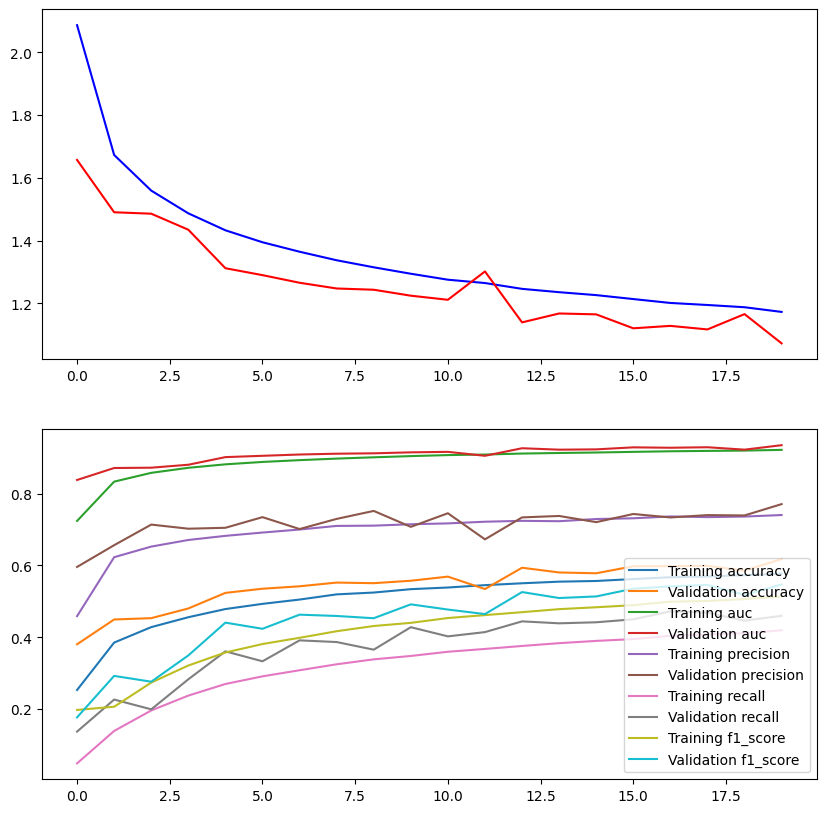

In [40]:
show_training_validation_loss_and_metrics(model21,metrics2)

In [41]:
model21.evaluate(test_it)

282/282 [==============================] - 5s 18ms/step - loss: 1.0728 - accuracy: 0.6199 - auc: 0.9344 - precision: 0.7750 - recall: 0.4720 - f1_score: 0.5555


[1.0728423595428467,
 0.6198889017105103,
 0.93438720703125,
 0.7750410437583923,
 0.47200000286102295,
 0.5555419921875]

# Architektura trzeciego modelu

In [42]:
model31 = Sequential()
model31.add(Conv2D(256, (3, 3), strides=1, padding="same", activation="sigmoid", 
                 input_shape=(32, 32, 3)))
model31.add(LayerNormalization())
model31.add(MaxPool2D((2, 2), strides=2, padding="same"))
model31.add(Conv2D(128, (3, 3), strides=1, padding="same", activation="sigmoid"))
model31.add(LayerNormalization())
model31.add(MaxPool2D((2, 2), strides=2, padding="same"))
model31.add(Dropout(0.2))
model31.add(Conv2D(64, (3, 3), strides=1, padding="same", activation="sigmoid"))
model31.add(LayerNormalization())
model31.add(MaxPool2D((2, 2), strides=2, padding="same"))
model31.add(Conv2D(32, (3, 3), strides=1, padding="same", activation="sigmoid"))
model31.add(LayerNormalization())
model31.add(MaxPool2D((2, 2), strides=2, padding="same"))
model31.add(Conv2D(16, (3, 3), strides=1, padding="same", activation="sigmoid"))
model31.add(LayerNormalization())
model31.add(MaxPool2D((2, 2), strides=2, padding="same"))
model31.add(Flatten())
model31.add(Dense(units=1024))
model31.add(Dropout(0.3))
model31.add(Dense(units=num_classes, activation="softmax"))

model31.compile( 
    optimizer=optimiser,
    loss=loss_func,
    metrics=metrics
)

#model3.summary()

In [43]:
history = model31.fit(
    train_it,
    validation_data=valid_it,
    steps_per_epoch=train_it.samples/train_it.batch_size,
    validation_steps=valid_it.samples/valid_it.batch_size, 
    epochs=20, 
    callbacks = [callback]
)

Epoch 1/20
984/984 [==============================] - 53s 53ms/step - loss: 1.8705 - accuracy: 0.2903 - auc: 0.7790 - precision: 0.5796 - recall: 0.0410 - f1_score: 0.2189 - val_loss: 1.7585 - val_accuracy: 0.3489 - val_auc: 0.8162 - val_precision: 0.5667 - val_recall: 0.1594 - val_f1_score: 0.2075
Epoch 2/20
984/984 [==============================] - 51s 52ms/step - loss: 1.6112 - accuracy: 0.3953 - auc: 0.8471 - precision: 0.6243 - recall: 0.1492 - f1_score: 0.2144 - val_loss: 1.5513 - val_accuracy: 0.4203 - val_auc: 0.8620 - val_precision: 0.5624 - val_recall: 0.2494 - val_f1_score: 0.2723
Epoch 3/20
984/984 [==============================] - 51s 52ms/step - loss: 1.5245 - accuracy: 0.4350 - auc: 0.8647 - precision: 0.6559 - recall: 0.2079 - f1_score: 0.2804 - val_loss: 1.4610 - val_accuracy: 0.4550 - val_auc: 0.8775 - val_precision: 0.6226 - val_recall: 0.2867 - val_f1_score: 0.3276
Epoch 4/20
984/984 [==============================] - 51s 52ms/step - loss: 1.4643 - accuracy: 0.457

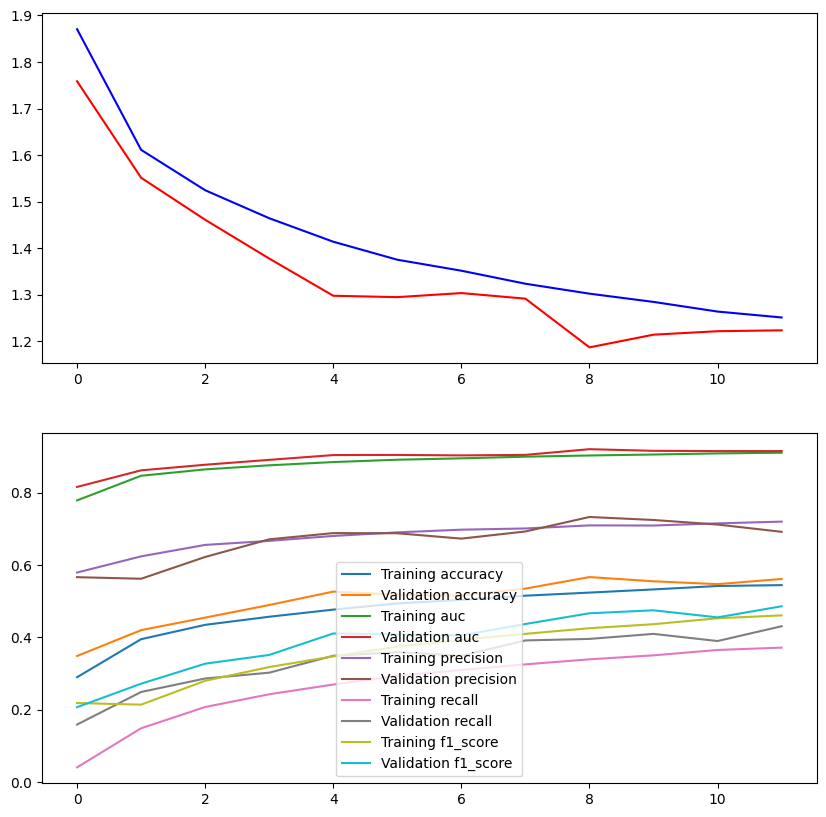

In [44]:
show_training_validation_loss_and_metrics(model31,metrics2)

In [45]:
model31.evaluate(test_it)

282/282 [==============================] - 5s 18ms/step - loss: 1.2217 - accuracy: 0.5643 - auc: 0.9151 - precision: 0.7031 - recall: 0.4433 - f1_score: 0.4978


[1.2216812372207642,
 0.5642777681350708,
 0.9150954484939575,
 0.7031195163726807,
 0.4432777762413025,
 0.49781927466392517]

# Ziarno 2137

In [46]:
SEED = 2137
splitfolder = 'D:\\GitHub\\cinic-10_image_classification_challenge-dataset\\'+str(SEED)

tf.random.set_seed(SEED)

splitfolders.ratio(cinic_directory_train, output=splitfolder,
    seed=SEED, ratio=(.7, .1, .2), group_prefix=None, move=False)

Copying files: 0 files [00:00, ? files/s]

Copying files: 90000 files [01:38, 916.90 files/s] 


In [47]:
datagen_train = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    brightness_range = [0.9,1.1],
    channel_shift_range = 50
    )
datagen_valid = ImageDataGenerator(samplewise_center=False)

In [48]:
# load and iterate training dataset
train_it = datagen_train.flow_from_directory(
    splitfolder+'\\train',
    seed=SEED,
    target_size=image_size,
    batch_size=batch_size_choice,
    color_mode="rgb",
    class_mode="categorical",
)
# load and iterate validation dataset
valid_it = datagen_valid.flow_from_directory(
    splitfolder+'\\val',
    seed=SEED,
    target_size=image_size,
    batch_size=batch_size_choice,
    color_mode="rgb",
    class_mode="categorical",
)
# load and iterate validation dataset
test_it = datagen_valid.flow_from_directory(
    splitfolder+'\\test',
    seed=SEED,
    target_size=image_size,
    batch_size=batch_size_choice,
    color_mode="rgb",
    class_mode="categorical",
)
# loading in the data
# train_ds = keras.preprocessing.image_dataset_from_directory(
#     splitfolder+'\\train',
#     seed=SEED,
#     image_size=image_size,
#     batch_size=batch_size_choice,
#     label_mode = "categorical"
# ) 
# validation_ds = keras.preprocessing.image_dataset_from_directory(
#     splitfolder+'\\val',
#     seed=SEED,
#     image_size=image_size,
#     batch_size=batch_size_choice,
#     label_mode = "categorical"
# )
# test_ds = keras.preprocessing.image_dataset_from_directory(
#     splitfolder+'\\test',
#     seed=SEED,
#     image_size=image_size,
#     batch_size=batch_size_choice,
#     label_mode = "categorical"
# )

Found 63000 images belonging to 10 classes.
Found 9000 images belonging to 10 classes.
Found 18000 images belonging to 10 classes.


In [49]:
class_names= ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
num_classes = len(class_names)
print(class_names)

metrics = ['accuracy','AUC','Precision','Recall', tfa.metrics.F1Score(num_classes=num_classes, threshold=0.5, average='weighted')]

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# Architektura pierwszego modelu

In [50]:
model12 = Sequential()

# model1.add(RandomFlip("horizontal",seed=SEED))
# model1.add(RandomRotation(0.1,seed=SEED))
# model1.add(RandomBrightness(0.1,seed=SEED))
# model1.add(RandomContrast(0.1,seed=SEED))
# model1.add(RandomTranslation(0.1,0.1,seed=SEED))
# model1.add(RandomZoom(0.1,seed=SEED))
# model1.add(RandomCrop(24,24,seed=SEED))

model12.add(Conv2D(256, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(32, 32, 3)))
model12.add(BatchNormalization())
model12.add(MaxPool2D((2, 2), strides=2, padding="same"))
model12.add(Conv2D(128, (3, 3), strides=1, padding="same", activation="relu"))
model12.add(BatchNormalization())
model12.add(MaxPool2D((2, 2), strides=2, padding="same"))
model12.add(Dropout(0.2))
model12.add(Conv2D(64, (3, 3), strides=1, padding="same", activation="relu"))
model12.add(BatchNormalization())
model12.add(MaxPool2D((2, 2), strides=2, padding="same"))
model12.add(Conv2D(32, (3, 3), strides=1, padding="same", activation="relu"))
model12.add(BatchNormalization())
model12.add(MaxPool2D((2, 2), strides=2, padding="same"))
model12.add(Flatten())
model12.add(Dense(units=512))
model12.add(Dropout(0.3))
model12.add(Dense(units=num_classes, activation="softmax"))

#model1_with_augmentation = Sequential([data_augmentation,model1])

In [51]:
model12.compile( 
    loss=loss_func,
    metrics=metrics
)

In [52]:
#model1.build((None,32,32,3))
model12.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 16, 16, 128)       295040    
                                                                 
 batch_normalization_9 (Batc  (None, 16, 16, 128)      512       
 hNormalization)                                                 
                                                      

In [53]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model12.fit(
    train_it,
    validation_data=valid_it,
    steps_per_epoch=train_it.samples/train_it.batch_size,
    validation_steps=valid_it.samples/valid_it.batch_size, 
    epochs=nb_epochs,
    callbacks = [callback] 
)

Epoch 1/20
984/984 [==============================] - 53s 53ms/step - loss: 1.7881 - accuracy: 0.3581 - auc: 0.8146 - precision: 0.5116 - recall: 0.1665 - f1_score: 0.2358 - val_loss: 1.9695 - val_accuracy: 0.3251 - val_auc: 0.8050 - val_precision: 0.4068 - val_recall: 0.2243 - val_f1_score: 0.2112
Epoch 2/20
984/984 [==============================] - 51s 52ms/step - loss: 1.4331 - accuracy: 0.4780 - auc: 0.8817 - precision: 0.6578 - recall: 0.2836 - f1_score: 0.3695 - val_loss: 1.7587 - val_accuracy: 0.4173 - val_auc: 0.8421 - val_precision: 0.5242 - val_recall: 0.3348 - val_f1_score: 0.3315
Epoch 3/20
984/984 [==============================] - 51s 52ms/step - loss: 1.3300 - accuracy: 0.5160 - auc: 0.8989 - precision: 0.6851 - recall: 0.3365 - f1_score: 0.4269 - val_loss: 1.4671 - val_accuracy: 0.4997 - val_auc: 0.8820 - val_precision: 0.6176 - val_recall: 0.3536 - val_f1_score: 0.4129
Epoch 4/20
984/984 [==============================] - 51s 52ms/step - loss: 1.2694 - accuracy: 0.539

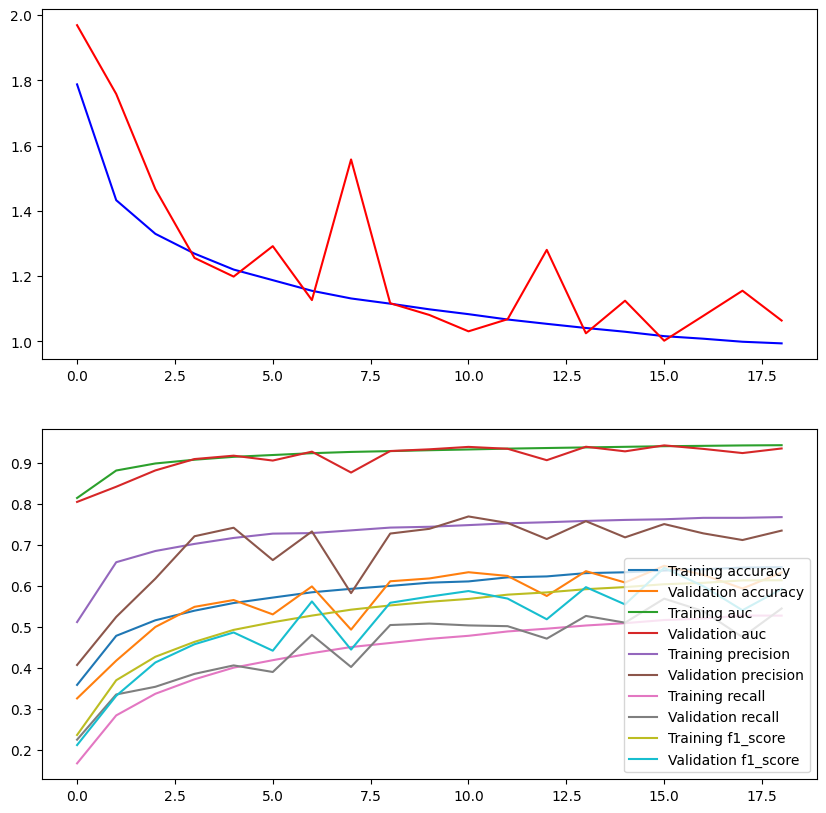

In [54]:
metrics2 = ['accuracy','auc','precision','recall','f1_score']
show_training_validation_loss_and_metrics(model12,metrics2)

In [55]:
model12.evaluate(test_it)

282/282 [==============================] - 5s 19ms/step - loss: 1.0623 - accuracy: 0.6364 - auc: 0.9361 - precision: 0.7330 - recall: 0.5495 - f1_score: 0.5958


[1.0622875690460205,
 0.6364444494247437,
 0.9361314177513123,
 0.7330467700958252,
 0.5494999885559082,
 0.5958045125007629]

# Architektura drugiego modelu

In [56]:
model22 = Sequential()
model22.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(32, 32, 3)))
model22.add(LayerNormalization())
model22.add(AveragePooling2D((2, 2), strides=2, padding="same"))
model22.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model22.add(LayerNormalization())
model22.add(AveragePooling2D((2, 2), strides=2, padding="same"))
model22.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model22.add(LayerNormalization())
model22.add(AveragePooling2D((2, 2), strides=2, padding="same"))
model22.add(LayerNormalization())
model22.add(Flatten())
model22.add(Dense(units=512))
model22.add(Dense(units=num_classes, activation="softmax"))

In [57]:
model22.compile( 
    loss=loss_func,
    metrics=metrics
)

In [58]:
model22.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 75)        2100      
                                                                 
 layer_normalization_18 (Lay  (None, 32, 32, 75)       150       
 erNormalization)                                                
                                                                 
 average_pooling2d_6 (Averag  (None, 16, 16, 75)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_29 (Conv2D)          (None, 16, 16, 50)        33800     
                                                                 
 layer_normalization_19 (Lay  (None, 16, 16, 50)       100       
 erNormalization)                                                
                                                      

In [59]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model22.fit(
    train_it,
    validation_data=valid_it,
    steps_per_epoch=train_it.samples/train_it.batch_size,
    validation_steps=valid_it.samples/valid_it.batch_size, 
    epochs=20, 
    callbacks = [callback]
)

Epoch 1/20
984/984 [==============================] - 53s 52ms/step - loss: 2.1414 - accuracy: 0.2537 - auc: 0.7162 - precision: 0.4387 - recall: 0.0516 - f1_score: 0.2463 - val_loss: 2.6799 - val_accuracy: 0.2250 - val_auc: 0.6539 - val_precision: 0.3574 - val_recall: 0.0989 - val_f1_score: 0.0933
Epoch 2/20
984/984 [==============================] - 52s 52ms/step - loss: 1.6682 - accuracy: 0.3877 - auc: 0.8342 - precision: 0.6203 - recall: 0.1409 - f1_score: 0.2094 - val_loss: 1.6662 - val_accuracy: 0.3998 - val_auc: 0.8331 - val_precision: 0.6887 - val_recall: 0.1517 - val_f1_score: 0.2175
Epoch 3/20
984/984 [==============================] - 51s 52ms/step - loss: 1.5675 - accuracy: 0.4262 - auc: 0.8559 - precision: 0.6451 - recall: 0.1934 - f1_score: 0.2714 - val_loss: 1.4638 - val_accuracy: 0.4689 - val_auc: 0.8760 - val_precision: 0.6612 - val_recall: 0.2839 - val_f1_score: 0.3568
Epoch 4/20
984/984 [==============================] - 52s 52ms/step - loss: 1.4935 - accuracy: 0.456

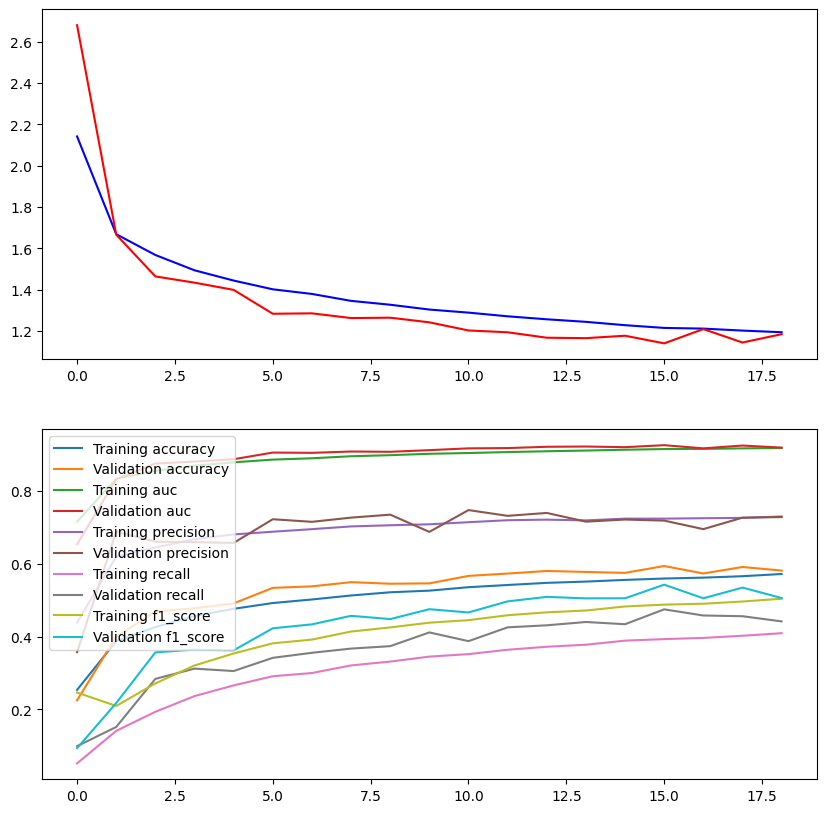

In [60]:
show_training_validation_loss_and_metrics(model22,metrics2)

In [61]:
model22.evaluate(test_it)

282/282 [==============================] - 5s 18ms/step - loss: 1.1925 - accuracy: 0.5771 - auc: 0.9190 - precision: 0.7225 - recall: 0.4353 - f1_score: 0.4979


[1.1925468444824219,
 0.5771111249923706,
 0.9189673066139221,
 0.7225193381309509,
 0.4352777898311615,
 0.49791020154953003]

# Architektura trzeciego modelu

In [62]:
model32 = Sequential()
model32.add(Conv2D(256, (3, 3), strides=1, padding="same", activation="sigmoid", 
                 input_shape=(32, 32, 3)))
model32.add(LayerNormalization())
model32.add(MaxPool2D((2, 2), strides=2, padding="same"))
model32.add(Conv2D(128, (3, 3), strides=1, padding="same", activation="sigmoid"))
model32.add(LayerNormalization())
model32.add(MaxPool2D((2, 2), strides=2, padding="same"))
model32.add(Dropout(0.2))
model32.add(Conv2D(64, (3, 3), strides=1, padding="same", activation="sigmoid"))
model32.add(LayerNormalization())
model32.add(MaxPool2D((2, 2), strides=2, padding="same"))
model32.add(Conv2D(32, (3, 3), strides=1, padding="same", activation="sigmoid"))
model32.add(LayerNormalization())
model32.add(MaxPool2D((2, 2), strides=2, padding="same"))
model32.add(Conv2D(16, (3, 3), strides=1, padding="same", activation="sigmoid"))
model32.add(LayerNormalization())
model32.add(MaxPool2D((2, 2), strides=2, padding="same"))
model32.add(Flatten())
model32.add(Dense(units=1024))
model32.add(Dropout(0.3))
model32.add(Dense(units=num_classes, activation="softmax"))

model32.compile( 
    optimizer=optimiser,
    loss=loss_func,
    metrics=metrics
)

#model3.summary()

In [63]:
history = model32.fit(
    train_it,
    validation_data=valid_it,
    steps_per_epoch=train_it.samples/train_it.batch_size,
    validation_steps=valid_it.samples/valid_it.batch_size, 
    epochs=20, 
    callbacks = [callback]
)

Epoch 1/20
984/984 [==============================] - 53s 53ms/step - loss: 1.8562 - accuracy: 0.2972 - auc: 0.7835 - precision: 0.5821 - recall: 0.0442 - f1_score: 0.2054 - val_loss: 1.6099 - val_accuracy: 0.3940 - val_auc: 0.8475 - val_precision: 0.6109 - val_recall: 0.1664 - val_f1_score: 0.2156
Epoch 2/20
984/984 [==============================] - 52s 52ms/step - loss: 1.6169 - accuracy: 0.3942 - auc: 0.8457 - precision: 0.6239 - recall: 0.1482 - f1_score: 0.2124 - val_loss: 1.5732 - val_accuracy: 0.4164 - val_auc: 0.8558 - val_precision: 0.5952 - val_recall: 0.2244 - val_f1_score: 0.2693
Epoch 3/20
984/984 [==============================] - 52s 52ms/step - loss: 1.5247 - accuracy: 0.4346 - auc: 0.8644 - precision: 0.6561 - recall: 0.2065 - f1_score: 0.2794 - val_loss: 1.4391 - val_accuracy: 0.4628 - val_auc: 0.8806 - val_precision: 0.6626 - val_recall: 0.2721 - val_f1_score: 0.3299
Epoch 4/20
984/984 [==============================] - 51s 52ms/step - loss: 1.4639 - accuracy: 0.459

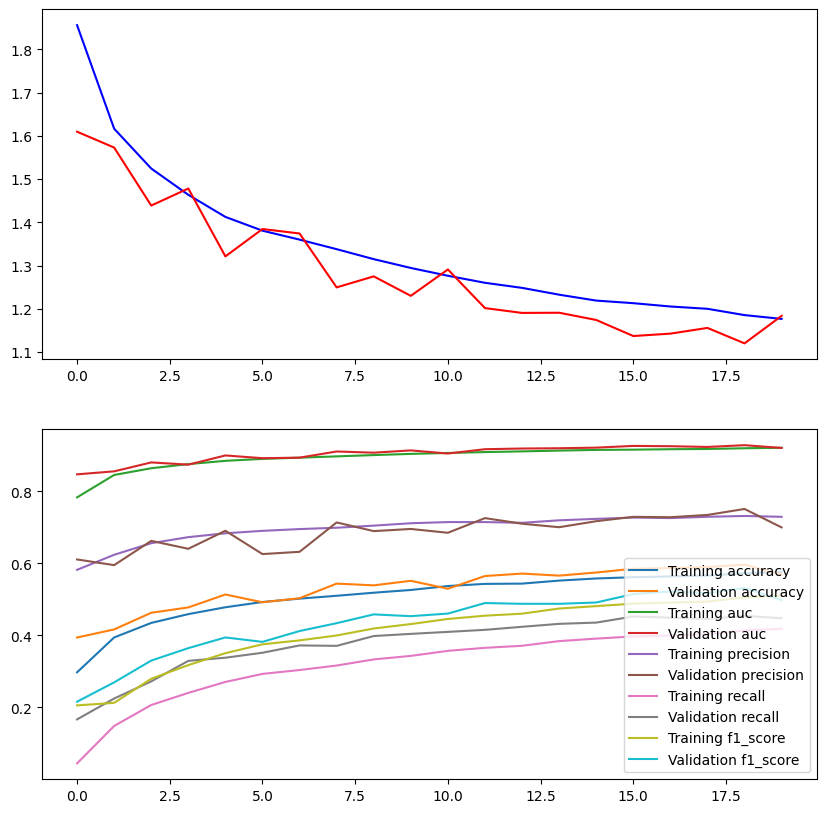

In [64]:
show_training_validation_loss_and_metrics(model32,metrics2)

In [65]:
model32.evaluate(test_it)

282/282 [==============================] - 5s 18ms/step - loss: 1.1785 - accuracy: 0.5744 - auc: 0.9217 - precision: 0.6954 - recall: 0.4515 - f1_score: 0.4997


[1.1785101890563965,
 0.574388861656189,
 0.9217031002044678,
 0.695447564125061,
 0.4514999985694885,
 0.49965813755989075]

# Ziarno 7654

In [66]:
SEED = 7654
splitfolder = 'D:\\GitHub\\cinic-10_image_classification_challenge-dataset\\'+str(SEED)

tf.random.set_seed(SEED)

splitfolders.ratio(cinic_directory_train, output=splitfolder,
    seed=SEED, ratio=(.7, .1, .2), group_prefix=None, move=False)

Copying files: 0 files [00:00, ? files/s]

Copying files: 90000 files [01:40, 895.73 files/s]


In [67]:
datagen_train = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    brightness_range = [0.9,1.1],
    channel_shift_range = 50
    )
datagen_valid = ImageDataGenerator(samplewise_center=False)

In [68]:
# load and iterate training dataset
train_it = datagen_train.flow_from_directory(
    splitfolder+'\\train',
    seed=SEED,
    target_size=image_size,
    batch_size=batch_size_choice,
    color_mode="rgb",
    class_mode="categorical",
)
# load and iterate validation dataset
valid_it = datagen_valid.flow_from_directory(
    splitfolder+'\\val',
    seed=SEED,
    target_size=image_size,
    batch_size=batch_size_choice,
    color_mode="rgb",
    class_mode="categorical",
)
# load and iterate validation dataset
test_it = datagen_valid.flow_from_directory(
    splitfolder+'\\test',
    seed=SEED,
    target_size=image_size,
    batch_size=batch_size_choice,
    color_mode="rgb",
    class_mode="categorical",
)
# loading in the data
# train_ds = keras.preprocessing.image_dataset_from_directory(
#     splitfolder+'\\train',
#     seed=SEED,
#     image_size=image_size,
#     batch_size=batch_size_choice,
#     label_mode = "categorical"
# ) 
# validation_ds = keras.preprocessing.image_dataset_from_directory(
#     splitfolder+'\\val',
#     seed=SEED,
#     image_size=image_size,
#     batch_size=batch_size_choice,
#     label_mode = "categorical"
# )
# test_ds = keras.preprocessing.image_dataset_from_directory(
#     splitfolder+'\\test',
#     seed=SEED,
#     image_size=image_size,
#     batch_size=batch_size_choice,
#     label_mode = "categorical"
# )

Found 63000 images belonging to 10 classes.
Found 9000 images belonging to 10 classes.
Found 18000 images belonging to 10 classes.


In [69]:
class_names= ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
num_classes = len(class_names)
print(class_names)

metrics = ['accuracy','AUC','Precision','Recall', tfa.metrics.F1Score(num_classes=num_classes, threshold=0.5, average='weighted')]

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# Architektura pierwszego modelu

In [70]:
model13 = Sequential()

# model1.add(RandomFlip("horizontal",seed=SEED))
# model1.add(RandomRotation(0.1,seed=SEED))
# model1.add(RandomBrightness(0.1,seed=SEED))
# model1.add(RandomContrast(0.1,seed=SEED))
# model1.add(RandomTranslation(0.1,0.1,seed=SEED))
# model1.add(RandomZoom(0.1,seed=SEED))
# model1.add(RandomCrop(24,24,seed=SEED))

model13.add(Conv2D(256, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(32, 32, 3)))
model13.add(BatchNormalization())
model13.add(MaxPool2D((2, 2), strides=2, padding="same"))
model13.add(Conv2D(128, (3, 3), strides=1, padding="same", activation="relu"))
model13.add(BatchNormalization())
model13.add(MaxPool2D((2, 2), strides=2, padding="same"))
model13.add(Dropout(0.2))
model13.add(Conv2D(64, (3, 3), strides=1, padding="same", activation="relu"))
model13.add(BatchNormalization())
model13.add(MaxPool2D((2, 2), strides=2, padding="same"))
model13.add(Conv2D(32, (3, 3), strides=1, padding="same", activation="relu"))
model13.add(BatchNormalization())
model13.add(MaxPool2D((2, 2), strides=2, padding="same"))
model13.add(Flatten())
model13.add(Dense(units=512))
model13.add(Dropout(0.3))
model13.add(Dense(units=num_classes, activation="softmax"))

#model1_with_augmentation = Sequential([data_augmentation,model1])

In [71]:
model13.compile( 
    loss=loss_func,
    metrics=metrics
)

In [72]:
#model1.build((None,32,32,3))
model13.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 256)      1024      
 chNormalization)                                                
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 16, 16, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 16, 16, 128)       295040    
                                                                 
 batch_normalization_13 (Bat  (None, 16, 16, 128)      512       
 chNormalization)                                                
                                                      

In [73]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model13.fit(
    train_it,
    validation_data=valid_it,
    steps_per_epoch=train_it.samples/train_it.batch_size,
    validation_steps=valid_it.samples/valid_it.batch_size, 
    epochs=nb_epochs,
    callbacks = [callback] 
)

Epoch 1/20
984/984 [==============================] - 53s 53ms/step - loss: 1.7860 - accuracy: 0.3613 - auc: 0.8148 - precision: 0.5185 - recall: 0.1674 - f1_score: 0.2374 - val_loss: 1.4432 - val_accuracy: 0.4759 - val_auc: 0.8801 - val_precision: 0.6419 - val_recall: 0.2842 - val_f1_score: 0.3547
Epoch 2/20
984/984 [==============================] - 51s 52ms/step - loss: 1.4384 - accuracy: 0.4750 - auc: 0.8810 - precision: 0.6524 - recall: 0.2817 - f1_score: 0.3679 - val_loss: 1.6484 - val_accuracy: 0.4409 - val_auc: 0.8550 - val_precision: 0.5538 - val_recall: 0.3297 - val_f1_score: 0.3512
Epoch 3/20
984/984 [==============================] - 52s 52ms/step - loss: 1.3295 - accuracy: 0.5184 - auc: 0.8990 - precision: 0.6861 - recall: 0.3364 - f1_score: 0.4273 - val_loss: 1.9064 - val_accuracy: 0.3942 - val_auc: 0.8081 - val_precision: 0.5355 - val_recall: 0.2991 - val_f1_score: 0.3093
Epoch 4/20
984/984 [==============================] - 51s 52ms/step - loss: 1.2657 - accuracy: 0.542

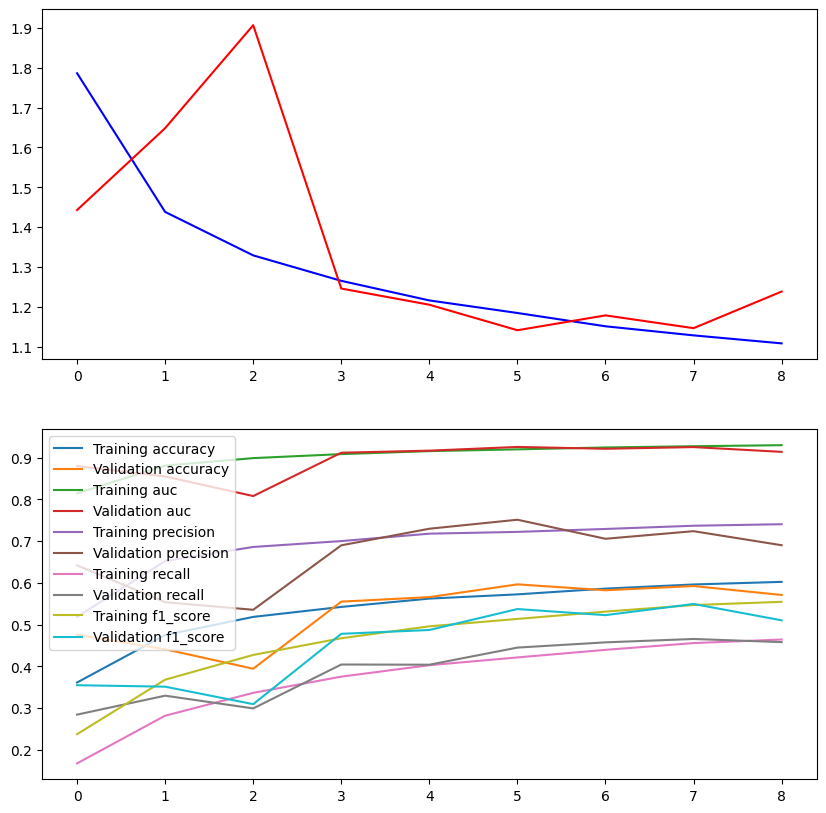

In [74]:
metrics2 = ['accuracy','auc','precision','recall','f1_score']
show_training_validation_loss_and_metrics(model13,metrics2)

In [75]:
model13.evaluate(test_it)

282/282 [==============================] - 5s 19ms/step - loss: 1.2166 - accuracy: 0.5721 - auc: 0.9169 - precision: 0.6946 - recall: 0.4613 - f1_score: 0.5175


[1.2166417837142944,
 0.5721111297607422,
 0.9169376492500305,
 0.6946373581886292,
 0.4612777829170227,
 0.5175184011459351]

# Architektura drugiego modelu

In [76]:
model23 = Sequential()
model23.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(32, 32, 3)))
model23.add(LayerNormalization())
model23.add(AveragePooling2D((2, 2), strides=2, padding="same"))
model23.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model23.add(LayerNormalization())
model23.add(AveragePooling2D((2, 2), strides=2, padding="same"))
model23.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model23.add(LayerNormalization())
model23.add(AveragePooling2D((2, 2), strides=2, padding="same"))
model23.add(LayerNormalization())
model23.add(Flatten())
model23.add(Dense(units=512))
model23.add(Dense(units=num_classes, activation="softmax"))

In [77]:
model23.compile( 
    loss=loss_func,
    metrics=metrics
)

In [78]:
model23.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 32, 32, 75)        2100      
                                                                 
 layer_normalization_27 (Lay  (None, 32, 32, 75)       150       
 erNormalization)                                                
                                                                 
 average_pooling2d_9 (Averag  (None, 16, 16, 75)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_41 (Conv2D)          (None, 16, 16, 50)        33800     
                                                                 
 layer_normalization_28 (Lay  (None, 16, 16, 50)       100       
 erNormalization)                                                
                                                     

In [79]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model23.fit(
    train_it,
    validation_data=valid_it,
    steps_per_epoch=train_it.samples/train_it.batch_size,
    validation_steps=valid_it.samples/valid_it.batch_size, 
    epochs=20, 
    callbacks = [callback]
)

Epoch 1/20
984/984 [==============================] - 53s 53ms/step - loss: 2.0644 - accuracy: 0.2683 - auc: 0.7337 - precision: 0.4745 - recall: 0.0587 - f1_score: 0.2262 - val_loss: 1.7248 - val_accuracy: 0.3579 - val_auc: 0.8222 - val_precision: 0.5536 - val_recall: 0.1319 - val_f1_score: 0.1872
Epoch 2/20
984/984 [==============================] - 52s 52ms/step - loss: 1.6458 - accuracy: 0.3954 - auc: 0.8394 - precision: 0.6217 - recall: 0.1518 - f1_score: 0.2228 - val_loss: 1.6283 - val_accuracy: 0.4078 - val_auc: 0.8433 - val_precision: 0.6215 - val_recall: 0.1833 - val_f1_score: 0.2398
Epoch 3/20
984/984 [==============================] - 52s 53ms/step - loss: 1.5344 - accuracy: 0.4396 - auc: 0.8625 - precision: 0.6583 - recall: 0.2126 - f1_score: 0.2949 - val_loss: 1.4503 - val_accuracy: 0.4730 - val_auc: 0.8785 - val_precision: 0.7140 - val_recall: 0.2350 - val_f1_score: 0.3175
Epoch 4/20
984/984 [==============================] - 51s 52ms/step - loss: 1.4690 - accuracy: 0.466

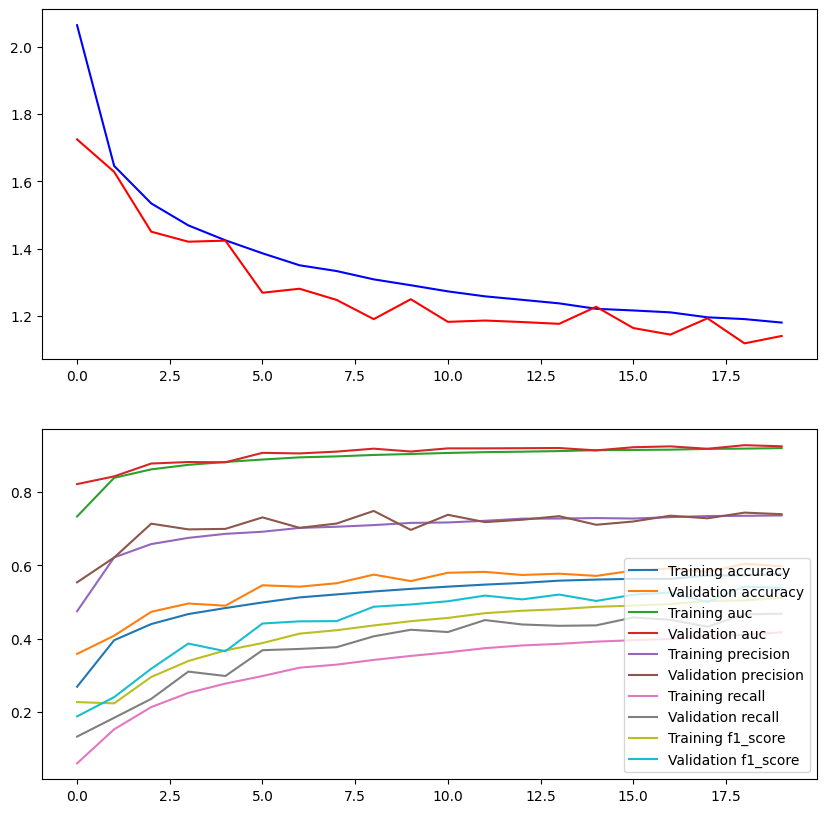

In [80]:
show_training_validation_loss_and_metrics(model23,metrics2)

In [81]:
model23.evaluate(test_it)

282/282 [==============================] - 5s 18ms/step - loss: 1.1411 - accuracy: 0.5997 - auc: 0.9254 - precision: 0.7403 - recall: 0.4664 - f1_score: 0.5372


[1.1411235332489014,
 0.5997222065925598,
 0.9254088401794434,
 0.7402998208999634,
 0.46638888120651245,
 0.5371930003166199]

# Architektura trzeciego modelu

In [82]:
model33 = Sequential()
model33.add(Conv2D(256, (3, 3), strides=1, padding="same", activation="sigmoid", 
                 input_shape=(32, 32, 3)))
model33.add(LayerNormalization())
model33.add(MaxPool2D((2, 2), strides=2, padding="same"))
model33.add(Conv2D(128, (3, 3), strides=1, padding="same", activation="sigmoid"))
model33.add(LayerNormalization())
model33.add(MaxPool2D((2, 2), strides=2, padding="same"))
model33.add(Dropout(0.2))
model33.add(Conv2D(64, (3, 3), strides=1, padding="same", activation="sigmoid"))
model33.add(LayerNormalization())
model33.add(MaxPool2D((2, 2), strides=2, padding="same"))
model33.add(Conv2D(32, (3, 3), strides=1, padding="same", activation="sigmoid"))
model33.add(LayerNormalization())
model33.add(MaxPool2D((2, 2), strides=2, padding="same"))
model33.add(Conv2D(16, (3, 3), strides=1, padding="same", activation="sigmoid"))
model33.add(LayerNormalization())
model33.add(MaxPool2D((2, 2), strides=2, padding="same"))
model33.add(Flatten())
model33.add(Dense(units=1024))
model33.add(Dropout(0.3))
model33.add(Dense(units=num_classes, activation="softmax"))

model33.compile( 
    optimizer=optimiser,
    loss=loss_func,
    metrics=metrics
)

#model3.summary()

In [83]:
history = model33.fit(
    train_it,
    validation_data=valid_it,
    steps_per_epoch=train_it.samples/train_it.batch_size,
    validation_steps=valid_it.samples/valid_it.batch_size, 
    epochs=20, 
    callbacks = [callback]
)

Epoch 1/20
984/984 [==============================] - 53s 53ms/step - loss: 1.8888 - accuracy: 0.2864 - auc: 0.7727 - precision: 0.5778 - recall: 0.0423 - f1_score: 0.2167 - val_loss: 1.5963 - val_accuracy: 0.3993 - val_auc: 0.8508 - val_precision: 0.6661 - val_recall: 0.1297 - val_f1_score: 0.1878
Epoch 2/20
984/984 [==============================] - 51s 52ms/step - loss: 1.6240 - accuracy: 0.3904 - auc: 0.8443 - precision: 0.6279 - recall: 0.1430 - f1_score: 0.2069 - val_loss: 1.5613 - val_accuracy: 0.4136 - val_auc: 0.8583 - val_precision: 0.5861 - val_recall: 0.2156 - val_f1_score: 0.2599
Epoch 3/20
984/984 [==============================] - 51s 52ms/step - loss: 1.5266 - accuracy: 0.4325 - auc: 0.8642 - precision: 0.6538 - recall: 0.2016 - f1_score: 0.2740 - val_loss: 1.4118 - val_accuracy: 0.4789 - val_auc: 0.8854 - val_precision: 0.6619 - val_recall: 0.2771 - val_f1_score: 0.3343
Epoch 4/20
984/984 [==============================] - 51s 52ms/step - loss: 1.4644 - accuracy: 0.457

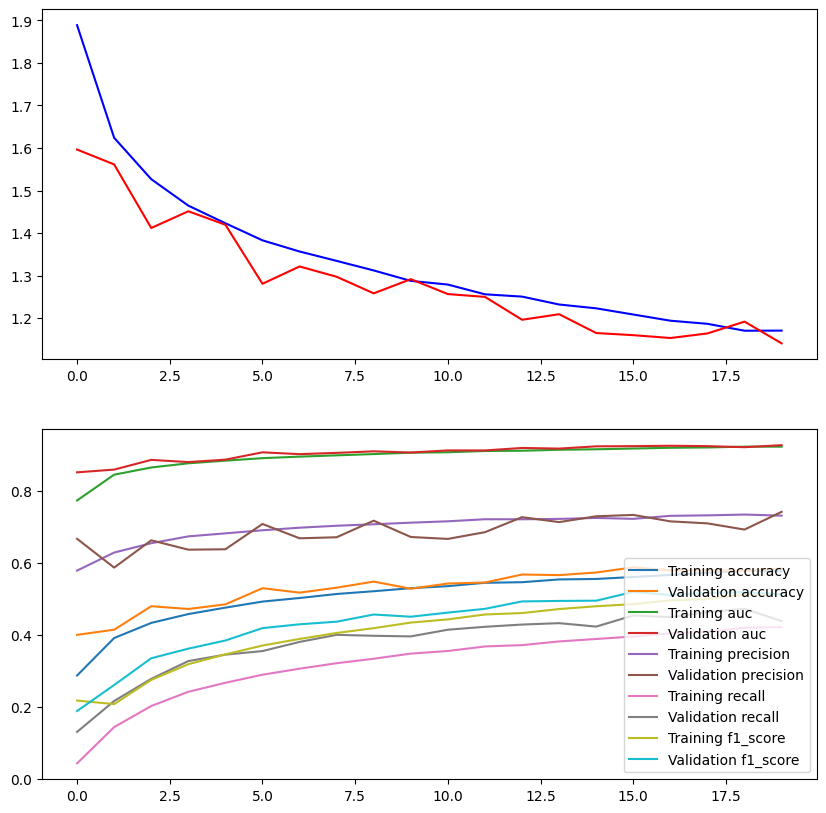

In [84]:
show_training_validation_loss_and_metrics(model33,metrics2)

In [85]:
model33.evaluate(test_it)

282/282 [==============================] - 5s 18ms/step - loss: 1.1322 - accuracy: 0.5875 - auc: 0.9272 - precision: 0.7477 - recall: 0.4354 - f1_score: 0.5127


[1.132163166999817,
 0.5874999761581421,
 0.9271885752677917,
 0.747734010219574,
 0.4353888928890228,
 0.5127066969871521]

# Ziarno 313

In [86]:
SEED = 313
splitfolder = 'D:\\GitHub\\cinic-10_image_classification_challenge-dataset\\'+str(SEED)

tf.random.set_seed(SEED)

splitfolders.ratio(cinic_directory_train, output=splitfolder,
    seed=SEED, ratio=(.7, .1, .2), group_prefix=None, move=False)

Copying files: 0 files [00:00, ? files/s]

Copying files: 90000 files [01:39, 906.45 files/s]


In [87]:
datagen_train = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    brightness_range = [0.9,1.1],
    channel_shift_range = 50
    )
datagen_valid = ImageDataGenerator(samplewise_center=False)

In [88]:
# load and iterate training dataset
train_it = datagen_train.flow_from_directory(
    splitfolder+'\\train',
    seed=SEED,
    target_size=image_size,
    batch_size=batch_size_choice,
    color_mode="rgb",
    class_mode="categorical",
)
# load and iterate validation dataset
valid_it = datagen_valid.flow_from_directory(
    splitfolder+'\\val',
    seed=SEED,
    target_size=image_size,
    batch_size=batch_size_choice,
    color_mode="rgb",
    class_mode="categorical",
)
# load and iterate validation dataset
test_it = datagen_valid.flow_from_directory(
    splitfolder+'\\test',
    seed=SEED,
    target_size=image_size,
    batch_size=batch_size_choice,
    color_mode="rgb",
    class_mode="categorical",
)
# loading in the data
# train_ds = keras.preprocessing.image_dataset_from_directory(
#     splitfolder+'\\train',
#     seed=SEED,
#     image_size=image_size,
#     batch_size=batch_size_choice,
#     label_mode = "categorical"
# ) 
# validation_ds = keras.preprocessing.image_dataset_from_directory(
#     splitfolder+'\\val',
#     seed=SEED,
#     image_size=image_size,
#     batch_size=batch_size_choice,
#     label_mode = "categorical"
# )
# test_ds = keras.preprocessing.image_dataset_from_directory(
#     splitfolder+'\\test',
#     seed=SEED,
#     image_size=image_size,
#     batch_size=batch_size_choice,
#     label_mode = "categorical"
# )

Found 63000 images belonging to 10 classes.
Found 9000 images belonging to 10 classes.
Found 18000 images belonging to 10 classes.


In [89]:
class_names= ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
num_classes = len(class_names)
print(class_names)

metrics = ['accuracy','AUC','Precision','Recall', tfa.metrics.F1Score(num_classes=num_classes, threshold=0.5, average='weighted')]

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# Architektura pierwszego modelu

In [90]:
model14 = Sequential()

# model1.add(RandomFlip("horizontal",seed=SEED))
# model1.add(RandomRotation(0.1,seed=SEED))
# model1.add(RandomBrightness(0.1,seed=SEED))
# model1.add(RandomContrast(0.1,seed=SEED))
# model1.add(RandomTranslation(0.1,0.1,seed=SEED))
# model1.add(RandomZoom(0.1,seed=SEED))
# model1.add(RandomCrop(24,24,seed=SEED))

model14.add(Conv2D(256, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(32, 32, 3)))
model14.add(BatchNormalization())
model14.add(MaxPool2D((2, 2), strides=2, padding="same"))
model14.add(Conv2D(128, (3, 3), strides=1, padding="same", activation="relu"))
model14.add(BatchNormalization())
model14.add(MaxPool2D((2, 2), strides=2, padding="same"))
model14.add(Dropout(0.2))
model14.add(Conv2D(64, (3, 3), strides=1, padding="same", activation="relu"))
model14.add(BatchNormalization())
model14.add(MaxPool2D((2, 2), strides=2, padding="same"))
model14.add(Conv2D(32, (3, 3), strides=1, padding="same", activation="relu"))
model14.add(BatchNormalization())
model14.add(MaxPool2D((2, 2), strides=2, padding="same"))
model14.add(Flatten())
model14.add(Dense(units=512))
model14.add(Dropout(0.3))
model14.add(Dense(units=num_classes, activation="softmax"))

#model1_with_augmentation = Sequential([data_augmentation,model1])

In [91]:
model14.compile( 
    loss=loss_func,
    metrics=metrics
)

In [92]:
#model1.build((None,32,32,3))
model14.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization_16 (Bat  (None, 32, 32, 256)      1024      
 chNormalization)                                                
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 16, 16, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 16, 16, 128)       295040    
                                                                 
 batch_normalization_17 (Bat  (None, 16, 16, 128)      512       
 chNormalization)                                                
                                                     

In [93]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model14.fit(
    train_it,
    validation_data=valid_it,
    steps_per_epoch=train_it.samples/train_it.batch_size,
    validation_steps=valid_it.samples/valid_it.batch_size, 
    epochs=nb_epochs,
    callbacks = [callback] 
)

Epoch 1/20
984/984 [==============================] - 53s 53ms/step - loss: 1.7973 - accuracy: 0.3556 - auc: 0.8123 - precision: 0.5123 - recall: 0.1610 - f1_score: 0.2293 - val_loss: 1.6400 - val_accuracy: 0.4130 - val_auc: 0.8455 - val_precision: 0.5956 - val_recall: 0.2534 - val_f1_score: 0.2938
Epoch 2/20
984/984 [==============================] - 51s 52ms/step - loss: 1.4459 - accuracy: 0.4717 - auc: 0.8796 - precision: 0.6553 - recall: 0.2764 - f1_score: 0.3623 - val_loss: 1.4050 - val_accuracy: 0.4768 - val_auc: 0.8888 - val_precision: 0.6095 - val_recall: 0.2979 - val_f1_score: 0.3276
Epoch 3/20
984/984 [==============================] - 51s 52ms/step - loss: 1.3366 - accuracy: 0.5151 - auc: 0.8978 - precision: 0.6868 - recall: 0.3326 - f1_score: 0.4219 - val_loss: 1.2778 - val_accuracy: 0.5442 - val_auc: 0.9077 - val_precision: 0.6799 - val_recall: 0.4078 - val_f1_score: 0.4706
Epoch 4/20
984/984 [==============================] - 51s 52ms/step - loss: 1.2729 - accuracy: 0.538

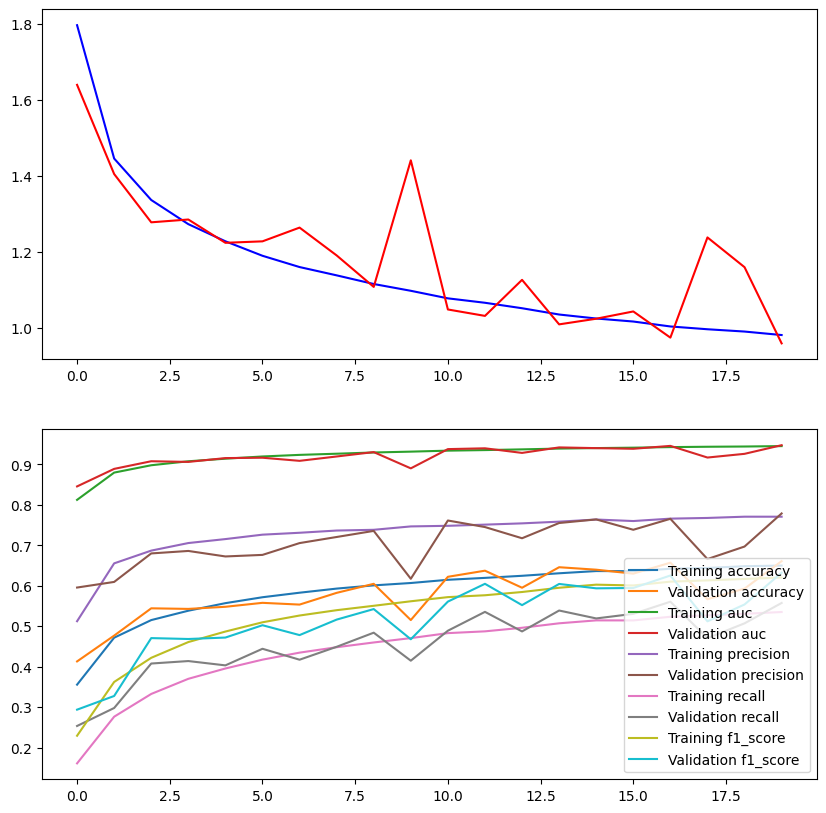

In [94]:
metrics2 = ['accuracy','auc','precision','recall','f1_score']
show_training_validation_loss_and_metrics(model14,metrics2)

In [95]:
model14.evaluate(test_it)

282/282 [==============================] - 5s 19ms/step - loss: 0.9636 - accuracy: 0.6608 - auc: 0.9468 - precision: 0.7787 - recall: 0.5519 - f1_score: 0.6267


[0.9636046886444092,
 0.6607778072357178,
 0.946822464466095,
 0.7787097096443176,
 0.5518888831138611,
 0.6266683340072632]

# Architektura drugiego modelu

In [96]:
model24 = Sequential()
model24.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(32, 32, 3)))
model24.add(LayerNormalization())
model24.add(AveragePooling2D((2, 2), strides=2, padding="same"))
model24.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model24.add(LayerNormalization())
model24.add(AveragePooling2D((2, 2), strides=2, padding="same"))
model24.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model24.add(LayerNormalization())
model24.add(AveragePooling2D((2, 2), strides=2, padding="same"))
model24.add(LayerNormalization())
model24.add(Flatten())
model24.add(Dense(units=512))
model24.add(Dense(units=num_classes, activation="softmax"))

In [97]:
model24.compile( 
    loss=loss_func,
    metrics=metrics
)

In [98]:
model24.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 32, 32, 75)        2100      
                                                                 
 layer_normalization_36 (Lay  (None, 32, 32, 75)       150       
 erNormalization)                                                
                                                                 
 average_pooling2d_12 (Avera  (None, 16, 16, 75)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_53 (Conv2D)          (None, 16, 16, 50)        33800     
                                                                 
 layer_normalization_37 (Lay  (None, 16, 16, 50)       100       
 erNormalization)                                                
                                                     

In [99]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model24.fit(
    train_it,
    validation_data=valid_it,
    steps_per_epoch=train_it.samples/train_it.batch_size,
    validation_steps=valid_it.samples/valid_it.batch_size, 
    epochs=20, 
    callbacks = [callback]
)

Epoch 1/20
984/984 [==============================] - 53s 53ms/step - loss: 2.1071 - accuracy: 0.2536 - auc: 0.7212 - precision: 0.4392 - recall: 0.0481 - f1_score: 0.2494 - val_loss: 1.7031 - val_accuracy: 0.3686 - val_auc: 0.8271 - val_precision: 0.5634 - val_recall: 0.1688 - val_f1_score: 0.2186
Epoch 2/20
984/984 [==============================] - 52s 52ms/step - loss: 1.6684 - accuracy: 0.3893 - auc: 0.8342 - precision: 0.6186 - recall: 0.1408 - f1_score: 0.2092 - val_loss: 1.5413 - val_accuracy: 0.4394 - val_auc: 0.8619 - val_precision: 0.6923 - val_recall: 0.1880 - val_f1_score: 0.2589
Epoch 3/20
984/984 [==============================] - 51s 52ms/step - loss: 1.5579 - accuracy: 0.4313 - auc: 0.8576 - precision: 0.6576 - recall: 0.2005 - f1_score: 0.2803 - val_loss: 1.4562 - val_accuracy: 0.4623 - val_auc: 0.8780 - val_precision: 0.6463 - val_recall: 0.2717 - val_f1_score: 0.3301
Epoch 4/20
984/984 [==============================] - 52s 52ms/step - loss: 1.4896 - accuracy: 0.458

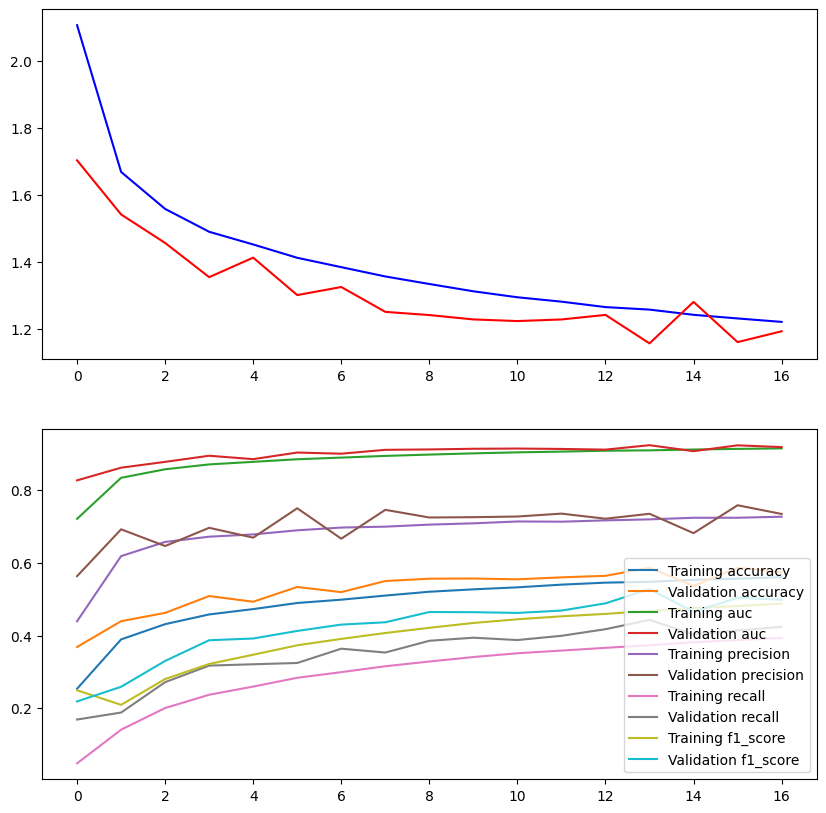

In [100]:
show_training_validation_loss_and_metrics(model24,metrics2)

In [101]:
model24.evaluate(test_it)

282/282 [==============================] - 5s 18ms/step - loss: 1.2037 - accuracy: 0.5694 - auc: 0.9172 - precision: 0.7327 - recall: 0.4103 - f1_score: 0.4847


[1.203742504119873,
 0.5694444179534912,
 0.9172229766845703,
 0.7327380776405334,
 0.4103333353996277,
 0.4847249686717987]

# Architektura trzeciego modelu

In [102]:
model34 = Sequential()
model34.add(Conv2D(256, (3, 3), strides=1, padding="same", activation="sigmoid", 
                 input_shape=(32, 32, 3)))
model34.add(LayerNormalization())
model34.add(MaxPool2D((2, 2), strides=2, padding="same"))
model34.add(Conv2D(128, (3, 3), strides=1, padding="same", activation="sigmoid"))
model34.add(LayerNormalization())
model34.add(MaxPool2D((2, 2), strides=2, padding="same"))
model34.add(Dropout(0.2))
model34.add(Conv2D(64, (3, 3), strides=1, padding="same", activation="sigmoid"))
model34.add(LayerNormalization())
model34.add(MaxPool2D((2, 2), strides=2, padding="same"))
model34.add(Conv2D(32, (3, 3), strides=1, padding="same", activation="sigmoid"))
model34.add(LayerNormalization())
model34.add(MaxPool2D((2, 2), strides=2, padding="same"))
model34.add(Conv2D(16, (3, 3), strides=1, padding="same", activation="sigmoid"))
model34.add(LayerNormalization())
model34.add(MaxPool2D((2, 2), strides=2, padding="same"))
model34.add(Flatten())
model34.add(Dense(units=1024))
model34.add(Dropout(0.3))
model34.add(Dense(units=num_classes, activation="softmax"))

model34.compile( 
    optimizer=optimiser,
    loss=loss_func,
    metrics=metrics
)

#model3.summary()

In [103]:
history = model34.fit(
    train_it,
    validation_data=valid_it,
    steps_per_epoch=train_it.samples/train_it.batch_size,
    validation_steps=valid_it.samples/valid_it.batch_size, 
    epochs=20, 
    callbacks = [callback]
)

Epoch 1/20
984/984 [==============================] - 53s 53ms/step - loss: 1.8687 - accuracy: 0.2915 - auc: 0.7784 - precision: 0.5833 - recall: 0.0499 - f1_score: 0.2049 - val_loss: 1.5818 - val_accuracy: 0.4080 - val_auc: 0.8532 - val_precision: 0.6478 - val_recall: 0.1637 - val_f1_score: 0.2254
Epoch 2/20
984/984 [==============================] - 51s 52ms/step - loss: 1.6037 - accuracy: 0.3985 - auc: 0.8485 - precision: 0.6322 - recall: 0.1558 - f1_score: 0.2207 - val_loss: 1.4556 - val_accuracy: 0.4562 - val_auc: 0.8778 - val_precision: 0.6498 - val_recall: 0.2470 - val_f1_score: 0.3031
Epoch 3/20
984/984 [==============================] - 51s 52ms/step - loss: 1.5062 - accuracy: 0.4401 - auc: 0.8682 - precision: 0.6571 - recall: 0.2157 - f1_score: 0.2882 - val_loss: 1.4479 - val_accuracy: 0.4751 - val_auc: 0.8801 - val_precision: 0.6449 - val_recall: 0.3024 - val_f1_score: 0.3494
Epoch 4/20
984/984 [==============================] - 51s 52ms/step - loss: 1.4477 - accuracy: 0.463

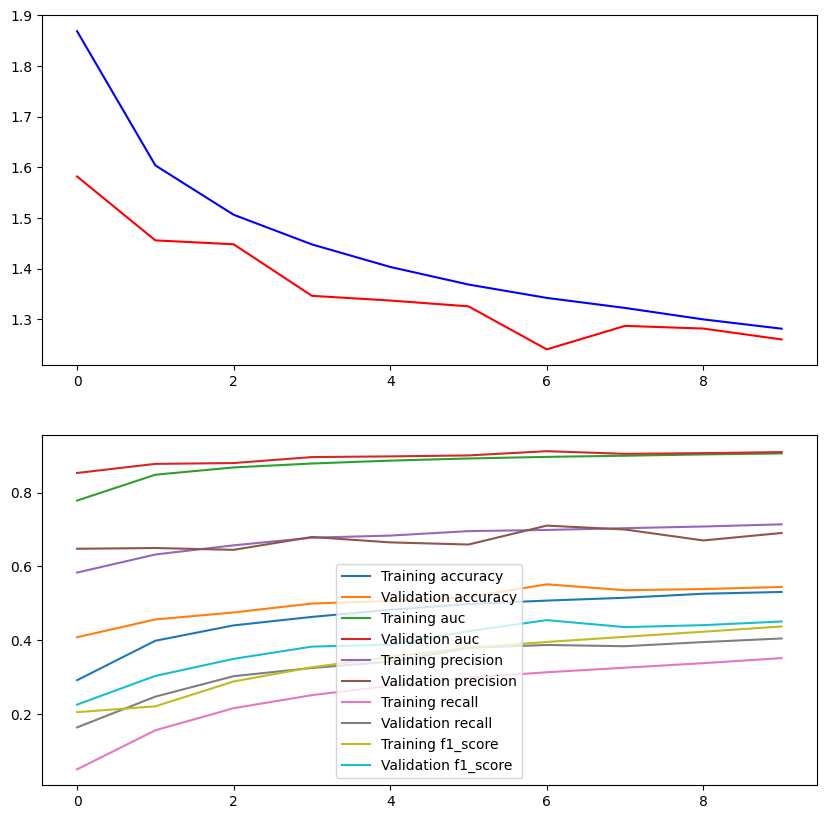

In [104]:
show_training_validation_loss_and_metrics(model34,metrics2)

In [105]:
model34.evaluate(test_it)

282/282 [==============================] - 5s 18ms/step - loss: 1.2813 - accuracy: 0.5362 - auc: 0.9067 - precision: 0.6869 - recall: 0.3999 - f1_score: 0.4462


[1.2812907695770264,
 0.5361666679382324,
 0.9066855311393738,
 0.6868619322776794,
 0.3999444544315338,
 0.44617000222206116]